#### Data Ingetion

In [2]:
path  =  r"C:\Users\admin\Downloads\Cars93 (4).csv"

In [3]:
import pandas as  pd
import  numpy as  np
import  matplotlib.pyplot as  plt
import seaborn as  sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

#####  read  file

In [5]:
df  =  pd.read_csv(path  ,  keep_default_na = False  , 
na_values  =  ['' , "NA"]  )

#### Basic  checks

In [6]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [8]:
df.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [9]:
##  check  missing value
df.isnull().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
## check  duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
##  drop  duplicate record 
df.drop_duplicates(keep  =  'first' , 
 ignore_index  =  True , inplace  =  True)


In [12]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

#### drop  column id  which not  related  to  weight

In [13]:
df.drop('id' , inplace  =  True ,  axis  =  1)

In [14]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

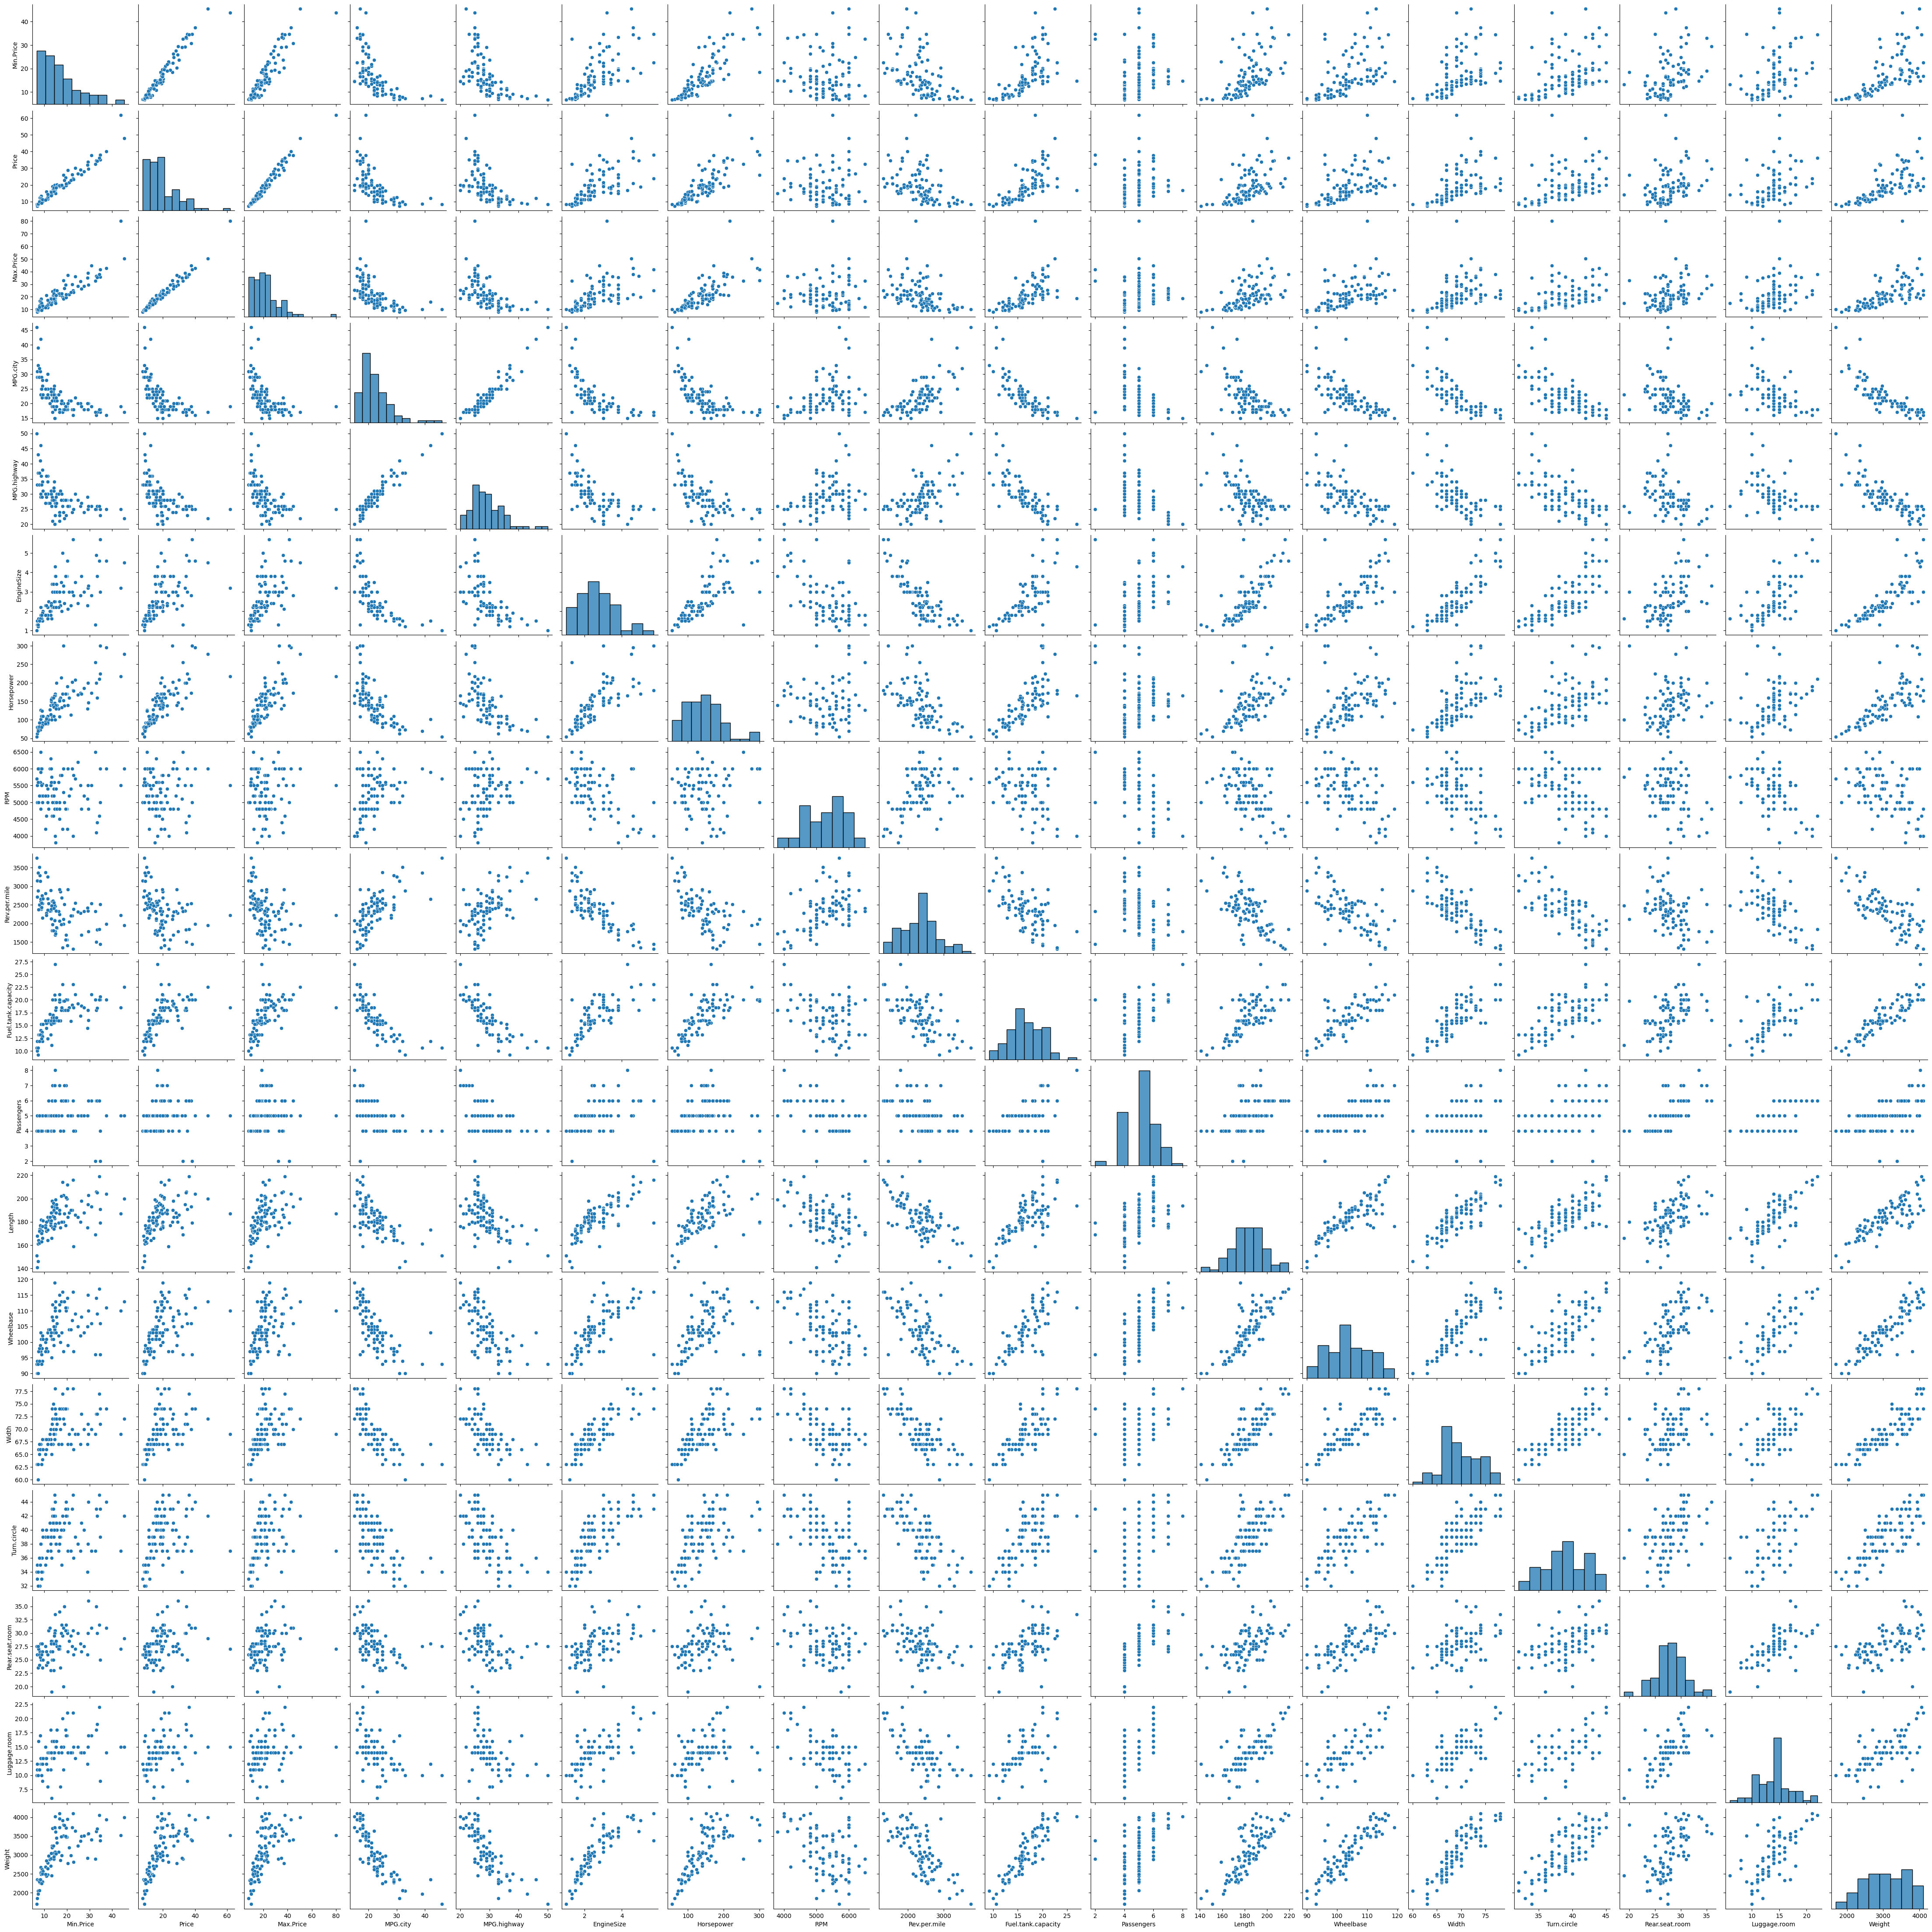

In [15]:
###  use  plot
sns.pairplot(df)

#### seperation of x and  y

In [16]:
x = df.drop(['Weight'] ,  axis  =  1)
y = df['Weight']

In [17]:
x.Model.replace({100: '100' ,  90:'90'  ,323 : '323' , 626:'626' , 900:'900'    , 240:'240' , 850:'850'   } , inplace=True)
 

In [18]:
x.Cylinders.dtype

dtype('O')

In [19]:
x.Cylinders.unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [20]:
x.Cylinders.value_counts()

Cylinders
4         49
6         31
8          7
3          3
5          2
rotary     1
Name: count, dtype: int64

In [21]:
x.Cylinders.replace({'rotary' : 4} , inplace  =  True)

In [22]:
x.Cylinders = x.Cylinders.astype('float')

### seperation of  categorical and  numerical  features

In [23]:
cat  =  x.columns[x.dtypes == 'object' ]
num  =    x.columns[x.dtypes != 'object' ]

In [24]:
print(cat)
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')


### create pipelines

In [25]:
from  sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import OneHotEncoder  , OrdinalEncoder, StandardScaler
from  sklearn.impute  import SimpleImputer
from  sklearn.compose  import ColumnTransformer

#### create num and  cat pipelines

In [26]:
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ))  ,  
                          ('scaler' ,  StandardScaler())])
cat_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy = 'most_frequent')) ,  
('encoder' , OrdinalEncoder())])

### compose  both pipelines

In [27]:
pre  =  ColumnTransformer([('cat' ,  cat_pipeline ,  cat) ,  
('num' ,  num_pipeline ,  num)])

In [28]:
pre

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


#### apply on data

In [29]:
x_scaled  =  pre.fit_transform(x)

In [30]:
x_scaled

array([[ 0.00000000e+00,  4.80000000e+01,  3.00000000e+00, ...,
        -6.10435875e-01, -4.52197077e-01, -1.03301503e+00],
       [ 0.00000000e+00,  5.50000000e+01,  2.00000000e+00, ...,
        -2.98509851e-01,  7.38090270e-01,  3.96642902e-01],
       [ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
        -6.10435875e-01,  5.79260718e-02,  3.92284189e-02],
       ...,
       [ 3.00000000e+01,  2.80000000e+01,  4.00000000e+00, ...,
        -9.22361900e-01, -6.22238126e-01,  3.96642902e-01],
       [ 3.10000000e+01,  2.00000000e+00,  0.00000000e+00, ...,
        -6.10435875e-01,  5.68049220e-01,  3.92284189e-02],
       [ 3.10000000e+01,  7.00000000e+00,  2.00000000e+00, ...,
        -2.98509851e-01,  7.38090270e-01,  3.96642902e-01]],
      shape=(93, 26))

#### convert  in dataframe

In [31]:
x_scaled  =  pd.DataFrame(x_scaled  ,  columns  =  pre.get_feature_names_out())

In [32]:
x_scaled.head()

,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Man.trans.avail,cat__Origin,cat__Make,num__Min.Price,num__Price,...,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Turn.circle,num__Rear.seat.room,num__Luggage.room
0,0.0,48.0,3.0,2.0,1.0,1.0,1.0,0.0,-0.485787,-0.375720,...,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,0.0,55.0,2.0,0.0,1.0,1.0,1.0,1.0,1.388017,1.497844,...,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.0,8.0,0.0,1.0,1.0,1.0,1.0,3.0,1.008658,0.998227,...,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.571949,1.893374,...,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,2.0,5.0,2.0,1.0,2.0,1.0,1.0,4.0,0.755752,1.091905,...,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


In [33]:
col  =  []
for  i  in  x_scaled.columns:
    out  =  i.split('__')[-1]
    col.append(out)

In [34]:
col

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Man.trans.avail',
 'Origin',
 'Make',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [35]:
x_scaled.columns  =  col

In [36]:
x_scaled.columns

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain',
       'Man.trans.avail', 'Origin', 'Make', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower',
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object')

#### feature  selection

In [37]:
from  sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [38]:
model  =  LinearRegression()
sel =  SequentialFeatureSelector(estimator  =  model, 
direction = 'forward' ,
 n_jobs  =  -1)

In [39]:
# fit data  on sel variable
sel.fit(x_scaled  , y)

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,-1
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [40]:
selected_feature = sel.get_feature_names_out()

In [41]:
selected_feature 

array(['Manufacturer', 'Type', 'Origin', 'Min.Price', 'MPG.highway',
       'Horsepower', 'RPM', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Rear.seat.room'], dtype=object)

In [42]:
x1  =  x[selected_feature]

In [43]:
x1

,Manufacturer,Type,Origin,Min.Price,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room
0,Acura,Small,non-USA,12.9,31,140,6300,13.2,5,177,102,68,26.5
1,Acura,Midsize,non-USA,29.2,25,200,5500,18.0,5,195,115,71,30.0
2,Audi,Compact,non-USA,25.9,26,172,5500,16.9,5,180,102,67,28.0
3,Audi,Midsize,non-USA,30.8,26,172,5500,21.1,6,193,106,70,31.0
4,BMW,Midsize,non-USA,23.7,30,208,5700,21.1,4,186,109,69,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,non-USA,16.6,21,109,4500,21.1,7,187,115,72,34.0
89,Volkswagen,Compact,non-USA,17.6,30,134,5800,18.5,5,180,103,67,31.5
90,Volkswagen,Sporty,non-USA,22.9,25,178,5800,18.5,4,159,97,66,26.0
91,Volvo,Compact,non-USA,21.8,28,114,5400,15.8,5,190,104,67,29.5


In [44]:
cat1  =  x1.columns[x1.dtypes == 'object' ]
num1 =    x1.columns[x1.dtypes != 'object' ]

In [45]:
print(cat1)


Index(['Manufacturer', 'Type', 'Origin'], dtype='object')


In [46]:
num_pipeline1  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ))  ,  
                          ('scaler' ,  StandardScaler())])
cat_pipeline1  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy = 'most_frequent')) ,  
('encoder' , OrdinalEncoder())])

In [47]:
pre1  =  ColumnTransformer([('cat1' ,  cat_pipeline1 ,  cat1) ,  
('num1' ,  num_pipeline1 ,  num1)])

### convert data

In [48]:
final_x  = pre1.fit_transform(x1)

In [49]:
final_x =  final_x.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [50]:
final_x

array([[ 0.00000000e+00,  3.00000000e+00,  1.00000000e+00, ...,
        -2.86932406e-01, -3.66183900e-01, -4.52197077e-01],
       [ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
         1.62964924e+00,  4.31982570e-01,  7.38090270e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -2.86932406e-01, -6.32239390e-01,  5.79260718e-02],
       ...,
       [ 3.00000000e+01,  4.00000000e+00,  1.00000000e+00, ...,
        -1.02407919e+00, -8.98294880e-01, -6.22238126e-01],
       [ 3.10000000e+01,  0.00000000e+00,  1.00000000e+00, ...,
         7.92630955e-03, -6.32239390e-01,  5.68049220e-01],
       [ 3.10000000e+01,  2.00000000e+00,  1.00000000e+00, ...,
         1.55355667e-01, -1.00128410e-01,  7.38090270e-01]],
      shape=(93, 13))

In [51]:
final_x  =  pd.DataFrame(final_x  ,  columns  =  pre1.get_feature_names_out())

In [52]:
final_x.head()

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
0,0.0,3.0,1.0,-0.485787,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197
1,0.0,2.0,1.0,1.388017,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090
2,1.0,0.0,1.0,1.008658,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926
3,1.0,2.0,1.0,1.571949,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172
4,2.0,2.0,1.0,0.755752,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156


####  train test  split

In [53]:
from  sklearn.model_selection import train_test_split
xtrain  ,  xtest  ,  ytrain  ,  ytest =  train_test_split(final_x ,  y ,
                                        test_size  =  0.2  ,
                                        random_state= 76   )

In [54]:
print(xtrain.shape  ,  ytrain.shape)
print(xtest.shape  ,  ytest.shape)

(74, 13) (74,)
(19, 13) (19,)


In [55]:
(xtrain.head())

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
86,29.0,5.0,1.0,0.203957,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.431983,2.438501
39,11.0,4.0,1.0,-0.646728,1.303790,-1.033324,0.201098,-1.307455,-1.050944,-1.322277,-1.024079,-0.632239,-1.132361
92,31.0,2.0,1.0,0.882205,-0.204794,0.464025,1.549001,0.808011,-0.083243,0.054786,0.155356,-0.100128,0.738090
71,23.0,4.0,0.0,-0.658223,0.172352,-0.994930,-0.472853,-0.234393,-1.050944,-0.702598,-1.024079,-0.632239,-1.132361
81,27.0,0.0,1.0,-0.094933,0.172352,-0.265452,0.538074,-0.234393,-0.083243,-0.289479,-0.286932,-0.632239,-0.282156


In [56]:
ytrain.head()

86    3785
39    2475
92    3245
71    2640
81    3085
Name: Weight, dtype: int64

In [57]:
xtest.head()

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
87,30.0,3.0,1.0,-0.968608,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-0.622238
66,21.0,2.0,1.0,0.445367,-0.581941,0.310451,-0.135877,0.562740,-0.083243,0.330199,0.007926,-0.100128,0.227967
49,15.0,2.0,1.0,2.020282,-1.147660,1.558242,1.212025,1.206577,-1.050944,0.536758,0.302785,0.431983,-0.962320
64,21.0,0.0,1.0,-0.474292,0.172352,0.118483,0.538074,-0.234393,-0.083243,-0.151773,-0.139503,-0.632239,0.227967
75,24.0,2.0,0.0,-0.198394,-0.393368,1.078322,-0.472853,-0.050439,-0.083243,0.812171,0.597644,0.698038,0.227967


In [58]:
ytest.head()

87    2240
66    3200
49    3515
64    3050
75    3450
Name: Weight, dtype: int64

##### fit  model

In [59]:
from  sklearn.linear_model  import LinearRegression
LR  =  LinearRegression()
LR.fit(xtrain  , ytrain )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
LR.score(xtrain  , ytrain)

0.9613306640841083

In [61]:
LR.score(xtest  ,  ytest)

0.9724421492898587

In [62]:
train_pred  =  LR.predict(xtrain)
train_pred

array([3747.00737439, 2352.83873166, 3169.64863363, 2596.22531295,
       2891.40196776, 2455.78217369, 3083.38086952, 2285.41065074,
       3961.25521772, 3436.5298078 , 3920.00156152, 2776.76666714,
       2864.44223117, 2960.27306372, 2558.88217518, 2430.57309071,
       4052.30999278, 3147.16246944, 3443.0268895 , 2871.92599044,
       2351.24613456, 3652.35733561, 3445.89520884, 3108.67620198,
       3623.30805286, 2942.36071693, 2469.95134352, 3216.13802957,
       3870.9127329 , 3654.03942895, 1874.16403892, 2976.92780329,
       2916.30276331, 3779.92576253, 2629.86539592, 2755.74209961,
       2327.20941563, 3104.41651434, 2700.06931692, 4101.9207892 ,
       3898.57289264, 3814.32045   , 3577.16930223, 3469.41323149,
       3562.59001344, 2353.27843466, 2928.38604436, 3673.7966864 ,
       2337.73945667, 3334.02656542, 2714.7909098 , 3530.29520405,
       2917.7773965 , 3113.7260151 , 2347.87064531, 2920.53204082,
       4001.53457689, 3644.96052601, 3056.09358424, 3883.55564

#### model  evaluation

In [63]:
from  sklearn.metrics  import (mean_squared_error ,
                               root_mean_squared_error ,
                                 mean_absolute_error 
                                 , mean_absolute_percentage_error , r2_score)

In [64]:
def evaluate(model  ,  x ,  y):
    pred  =  model.predict(x)
    MSE  = mean_squared_error(y  ,  pred)
    RMSE  = root_mean_squared_error(y , pred)
    MAE  =  mean_absolute_error(y  , pred)
    MAPE  =  mean_absolute_percentage_error(y  , pred)
    r2  =  r2_score(y , pred)

    print(f'MSE -->  {MSE}')
    print(f'MAE -->  {MAE}')
    print(f'MAPE -->  {MAPE}')
    print(f'RMSE -->  {RMSE}')
    print(f'r2 -->  {r2}')

### training Evaluation

In [65]:
evaluate(LR  , xtrain  , ytrain)

MSE -->  13717.535930890434
MAE -->  94.14647400207588
MAPE -->  0.03162046075911302
RMSE -->  117.12188493569609
r2 -->  0.9613306640841083


#### testing evaluation

In [66]:
evaluate(LR  ,  xtest  ,  ytest)

MSE -->  8185.50228943035
MAE -->  79.68036847435683
MAPE -->  0.026792746735617875
RMSE -->  90.47376575245639
r2 -->  0.9724421492898587


####   prediction  on  unseen data

In [67]:
sample  =  pd.read_csv(r"C:\Users\admin\Downloads\sample (1).csv" ,
 keep_default_na= False  ,  na_values  = ['' , 'NA'])

In [68]:
sample.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [69]:
pre1

,transformers,"[('cat1', ...), ('num1', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [70]:
sample_data  =  pre1.fit_transform(sample)

In [71]:
sample_data =  pd.DataFrame(sample_data  , 
                            columns =  pre1.get_feature_names_out())

In [72]:
xtrain.shape

(74, 13)

In [73]:
sample_data.shape


(5, 13)

##### predict  weight

In [74]:
predicted_data  =  LR.predict(sample_data)

In [75]:
predicted_data

array([3479.75886534, 2904.62533928, 3319.45825881, 3214.56302962,
       2310.1327272 ])

##### Ridge  regression

In [76]:
final_x

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
0,0.0,3.0,1.0,-0.485787,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197
1,0.0,2.0,1.0,1.388017,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090
2,1.0,0.0,1.0,1.008658,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926
3,1.0,2.0,1.0,1.571949,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172
4,2.0,2.0,1.0,0.755752,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,30.0,5.0,1.0,-0.060445,-1.524806,-0.668585,-1.315292,1.359872,1.852158,0.261346,1.629649,0.698038,2.098419
89,30.0,0.0,1.0,0.054512,0.172352,-0.188665,0.875050,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,1.248213
90,30.0,4.0,1.0,0.663786,-0.770514,0.655993,0.875050,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.622238
91,31.0,0.0,1.0,0.537333,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,-0.632239,0.568049


In [77]:
xtrain.head()

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
86,29.0,5.0,1.0,0.203957,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.431983,2.438501
39,11.0,4.0,1.0,-0.646728,1.303790,-1.033324,0.201098,-1.307455,-1.050944,-1.322277,-1.024079,-0.632239,-1.132361
92,31.0,2.0,1.0,0.882205,-0.204794,0.464025,1.549001,0.808011,-0.083243,0.054786,0.155356,-0.100128,0.738090
71,23.0,4.0,0.0,-0.658223,0.172352,-0.994930,-0.472853,-0.234393,-1.050944,-0.702598,-1.024079,-0.632239,-1.132361
81,27.0,0.0,1.0,-0.094933,0.172352,-0.265452,0.538074,-0.234393,-0.083243,-0.289479,-0.286932,-0.632239,-0.282156


In [78]:
ytrain.head()

86    3785
39    2475
92    3245
71    2640
81    3085
Name: Weight, dtype: int64

In [79]:
xtest.head()

,cat1__Manufacturer,cat1__Type,cat1__Origin,num1__Min.Price,num1__MPG.highway,num1__Horsepower,num1__RPM,num1__Fuel.tank.capacity,num1__Passengers,num1__Length,num1__Wheelbase,num1__Width,num1__Rear.seat.room
87,30.0,3.0,1.0,-0.968608,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-0.622238
66,21.0,2.0,1.0,0.445367,-0.581941,0.310451,-0.135877,0.562740,-0.083243,0.330199,0.007926,-0.100128,0.227967
49,15.0,2.0,1.0,2.020282,-1.147660,1.558242,1.212025,1.206577,-1.050944,0.536758,0.302785,0.431983,-0.962320
64,21.0,0.0,1.0,-0.474292,0.172352,0.118483,0.538074,-0.234393,-0.083243,-0.151773,-0.139503,-0.632239,0.227967
75,24.0,2.0,0.0,-0.198394,-0.393368,1.078322,-0.472853,-0.050439,-0.083243,0.812171,0.597644,0.698038,0.227967


In [80]:
ytest.head()

87    2240
66    3200
49    3515
64    3050
75    3450
Name: Weight, dtype: int64

In [81]:
from  sklearn.linear_model import Ridge
ridge  =  Ridge(alpha =  2 )

In [82]:
ridge.fit(xtrain ,  ytrain  )

,alpha,2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


###  evaluate  model

In [83]:
evaluate(ridge ,  xtrain  ,  ytrain)

MSE -->  14139.47016150871
MAE -->  94.5013358212859
MAPE -->  0.031888270781794126
RMSE -->  118.9095040840248
r2 -->  0.9601412437260796


In [84]:
evaluate(ridge ,  xtest  ,  ytest)

MSE -->  8472.889436708982
MAE -->  78.37109564703054
MAPE -->  0.025728529762236958
RMSE -->  92.04829947755135
r2 -->  0.9714746128063683


In [85]:
from  sklearn.model_selection import cross_val_score

In [86]:
base_model  =  Ridge()

In [87]:
ridge_cvs =  cross_val_score(estimator= base_model ,  
                             cv  =  5 , 
                            X  =  xtrain  ,  y  =  ytrain ,  
                            n_jobs  =  -1 )

In [88]:
ridge_cvs

array([0.91636767, 0.89220042, 0.95527856, 0.90323853, 0.96538075])

In [89]:
ridge_cvs.mean()

np.float64(0.9264931858734702)

In [90]:
ridge_cvs.std()

np.float64(0.028844895339267707)